<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/classificacao_multiclasse/classificacao-multiclasse_iris_validacao_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/iris.csv', sep=',')
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


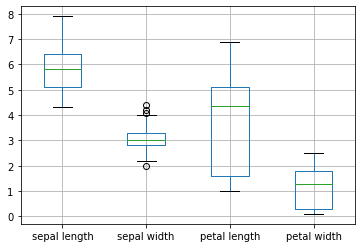

In [25]:
base[['sepal length',	'sepal width',	'petal length',	'petal width']].boxplot()

In [3]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [4]:
classe

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [5]:
classe.shape

(150,)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential # camadas sequencialmente
from keras.layers import Dense # camadas profundas fullconnect ou densa
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

**Deve transformar dados categórico para numérico.**

In [7]:
labelEncoder = LabelEncoder()
classe = labelEncoder.fit_transform(classe)
classe # 3 tipos em uma coluna

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Transformação categórica em 3 colunas, pois a camada de saída tem três neurônios
# iris - setosa     1 0 0
# iris - virginica  0 1 0
# iris - versicolor 0 0 1
classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
# (quantidade de entrada + quantidade de saída) / 2
units = np.round((4 + 3) / 2)
units

4.0

In [28]:
def criarRede():
  classificador = Sequential();
  classificador.add(Dense(units = 4, 
                        activation = 'relu',
                        input_dim = 4));

  classificador.add(Dense(units = 4, 
                        activation = 'relu'));

  # Função softmax retorna probabilidade para cada classe
  classificador.add(Dense(units=3, activation = 'softmax'));

  classificador.compile(optimizer = 'adam', 
                      loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy']);
  return classificador;

In [29]:
classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 1000,
                                batch_size = 10)

In [ ]:
resultado = cross_val_score(estimator = classificador,
                            X = previsores, 
                            y = classe,
                            cv = 10,
                            scoring = 'accuracy');

Streaming output truncated to the last 5000 lines.
14/14 [==============================] - 0s 2ms/step - loss: 0.5617 - categorical_accuracy: 0.6222
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5613 - categorical_accuracy: 0.6222
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5608 - categorical_accuracy: 0.6222
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5605 - categorical_accuracy: 0.6222
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5599 - categorical_accuracy: 0.6222
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5595 - categorical_accuracy: 0.6222
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5591 - categorical_accuracy: 0.6222
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5587 - categorical_accuracy: 0.6222
Epoch 235/1000
14/14 [==============================

In [14]:
media = resultado.mean()
media

array([[False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [Fa

In [17]:
desvio = resultado.std()
desvio

[1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0]

In [20]:
classe_teste

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [21]:
previsoes2 = [np.argmax(t) for t in previsoes]
previsoes2

[1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0]

In [18]:
from sklearn.metrics import confusion_matrix

In [22]:
matriz = confusion_matrix(previsoes2, classe_teste2)
matriz

array([[15,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 13]])

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

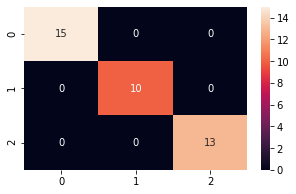

In [24]:
plt.figure(figsize=(5, 3))
sn.heatmap(matriz, annot=True)
plt.show()